<h1> Homework 2 </h1>
Matt Buchovecky

In [93]:
from scipy import random, optimize, std
from matplotlib import pyplot
%matplotlib inline
import numpy


Initialize

In [114]:
x_data = [ 3.0, 8.0, 9.0 ]
y_data = [ 8.95041659264, 7.06087129958, 9.17988634079 ]

sigma_meas = 1.0 # standard deviation of measurements 
p_error = 0.30 # probability of experimental mistake occurring
add_inc = 5.0 # additive increase error 

def lin_min(a, x, y):
    return numpy.sum((numpy.asarray(y) - ( a[0]*numpy.ones(len(y)) + a[1]*numpy.asarray(x) ))**2)


In [102]:
guess_a = [ 0.1, 0.1 ]
optimize.fmin(lin_min, guess_a, args=(x_data, y_data))


Optimization terminated successfully.
         Current function value: 2.513964
         Iterations: 69
         Function evaluations: 132


array([ 9.03702713, -0.09599509])

In [107]:
guess_b = [ 1., 1. ]
print(optimize.fmin(lin_min, guess_b, args=(x_data, y_data)))


Optimization terminated successfully.
         Current function value: 2.513964
         Iterations: 50
         Function evaluations: 94
[ 9.03701413 -0.09599332]


In [110]:
guess_c = [ 5., 1. ]
optimize.fmin(lin_min, guess_c, args=(x_data, y_data))


Optimization terminated successfully.
         Current function value: 2.513964
         Iterations: 51
         Function evaluations: 95


array([ 9.03708985, -0.09600336])

Simulate Larger dataset 

In [121]:
num_trials = 1000
x_n = arange(0, num_trials)
y_n = zeros(num_trials)

n = 0
while n < num_trials:
    y_n[n] = scipy.random.normal(x_n[n], sigma_meas)
    uni_rand = random.rand()
    if uni_rand < p_error:
        y_n[n] = y_n[n] + add_inc 
    n = n + 1
   

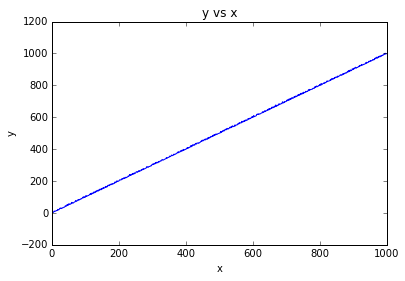

In [124]:
pyplot.title("y vs x ")
pyplot.plot(x_n, y_n)
pyplot.xlabel("x")
pyplot.ylabel("y")


In [123]:
guess_sim = [ p_error*add_inc, 1. ]
optimize.fmin(lin_min, guess_sim, args=(x_n, y_n))


Optimization terminated successfully.
         Current function value: 6190.608107
         Iterations: 35
         Function evaluations: 69


array([ 1.43835192,  0.99982332])

# truss me daddi